In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import datetime
from pylab import rcParams
%matplotlib inline

In [2]:
data = pd.read_csv("testset.csv",parse_dates=['datetime_utc'],skipinitialspace=True)

In [45]:
data.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm'],
      dtype='object')

In [46]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [47]:
data.shape

(100990, 20)

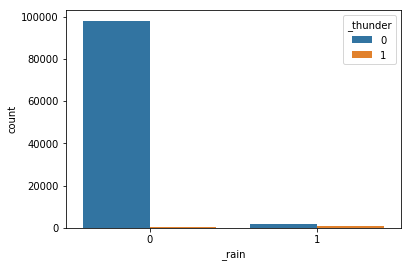

In [48]:
sns.countplot(x='_rain', hue='_thunder',data = data)

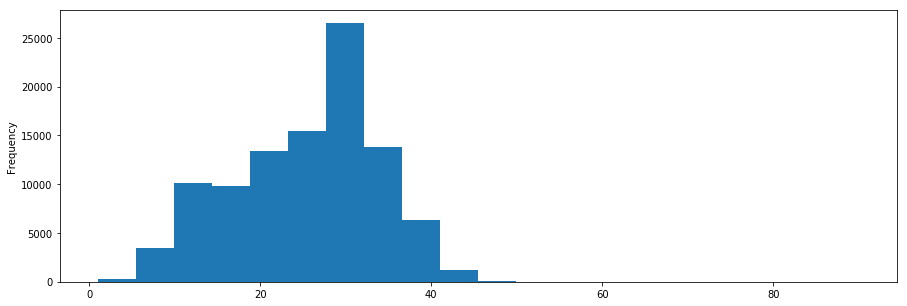

In [38]:
data['_tempm'].plot.hist(bins= 20,figsize= (15,5))

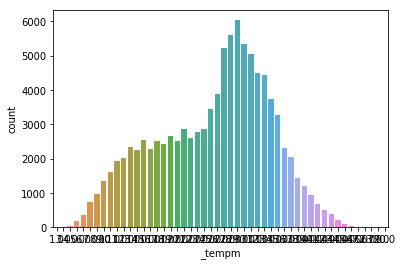

In [49]:
sns.countplot(x='_tempm',data = data)

In [50]:
#'Formatted Date' transformation:
data['Date'] = pd.to_datetime(data['datetime_utc'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['hour'] = data['Date'].dt.hour

Text(0.5, 0, 'year')

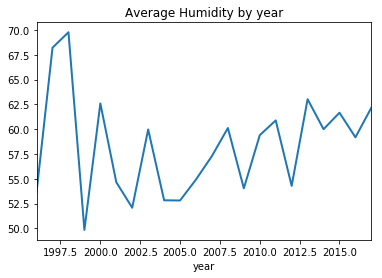

In [51]:
year_humi = data.groupby(data.year).mean()
year_humi._hum.plot(linewidth=2)
plt.title('Average Humidity by year')
plt.xlabel('year')

Text(0.5, 0, 'year')

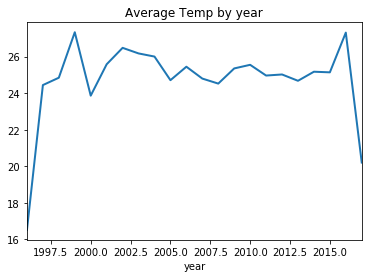

In [52]:
year_heat = data.groupby(data.year).mean()
year_heat._tempm .plot(linewidth=2)
plt.title('Average Temp by year')
plt.xlabel('year')

Text(0.5, 0, 'year')

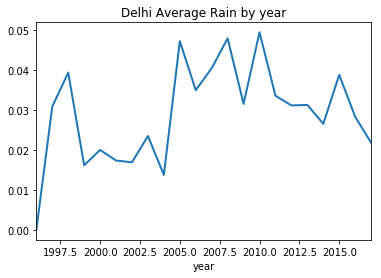

In [53]:
year_rain = data.groupby(data.year).mean()
year_rain._rain.plot(linewidth=2)
plt.title('Delhi Average Rain by year')
plt.xlabel('year')

[[Text(0, 0, '1996'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '2016'),
  Text(0, 0, '')]]

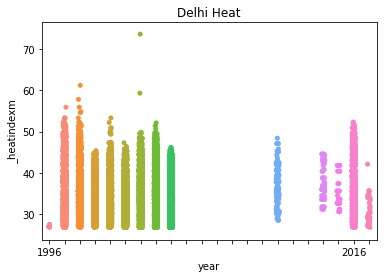

In [54]:
p = sns.stripplot(data=data, x='year', y='_heatindexm');
p.set(title='Delhi Heat')
dec_ticks = [y if not x%20 else '' for x,y in enumerate(p.get_xticklabels())]
p.set(xticklabels=dec_ticks)

In [55]:
#Drawing a heatmap
def facet_heatmap(data, color, **kws):
    values=data.columns.values[3]
    data = data.pivot(index='day', columns='hour', values=values)
    sns.heatmap(data, cmap='coolwarm', **kws)  

#Joining heatmaps of every month in a year 
def weather_calendar(year,weather): 
    dfyear = data[data['year']==year][['month', 'day', 'hour', weather]]
    vmin=dfyear[weather].min()
    vmax=dfyear[weather].max()
    with sns.plotting_context(font_scale=12):
        g = sns.FacetGrid(dfyear,col="month", col_wrap=3) #One heatmap per month
        g = g.map_dataframe(facet_heatmap,vmin=vmin, vmax=vmax)
        g.set_axis_labels('Hour', 'Day')
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle('%s Calendar. Year: %s.' %(weather, year), fontsize=18)

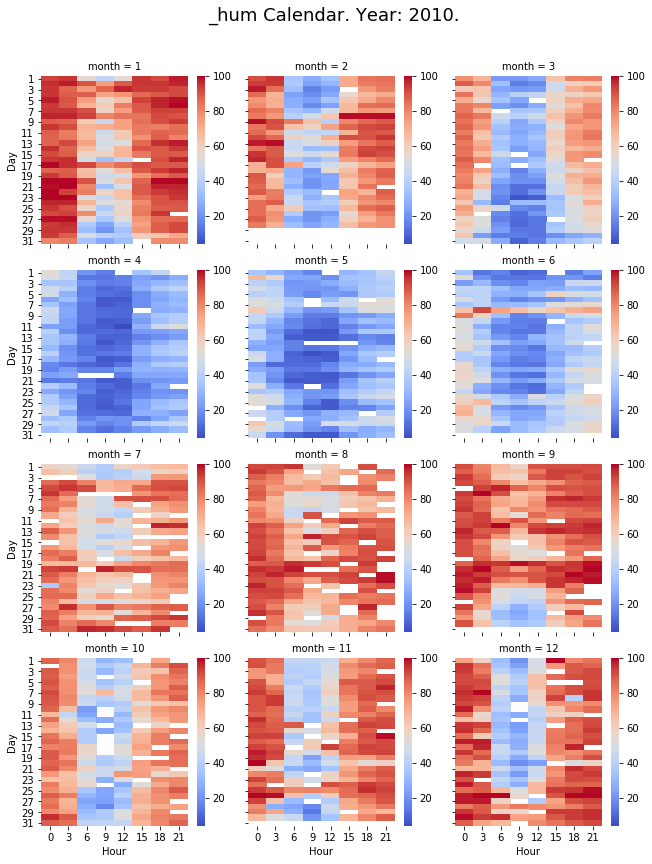

In [56]:
weather_calendar(2010,'_hum')

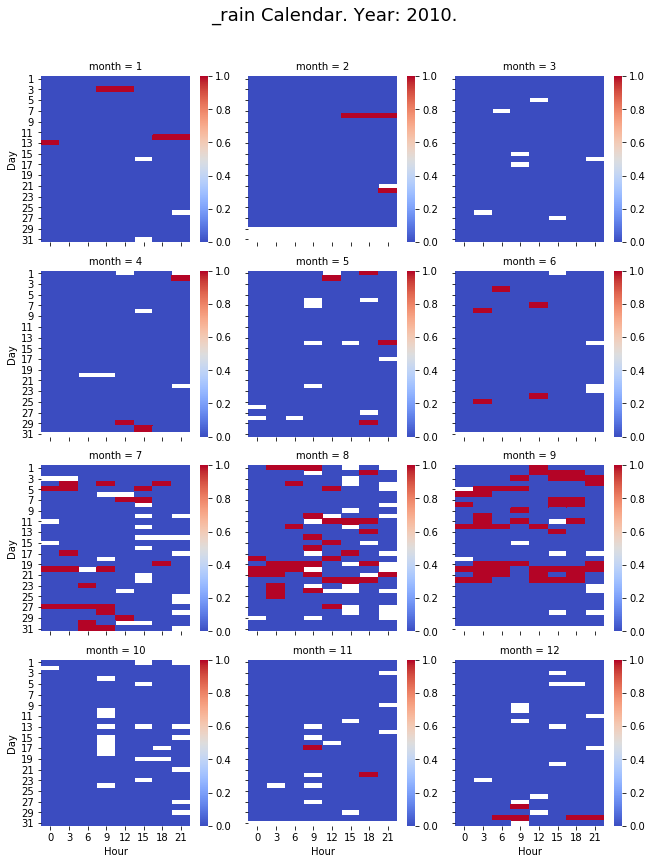

In [57]:
weather_calendar(2010,'_rain')

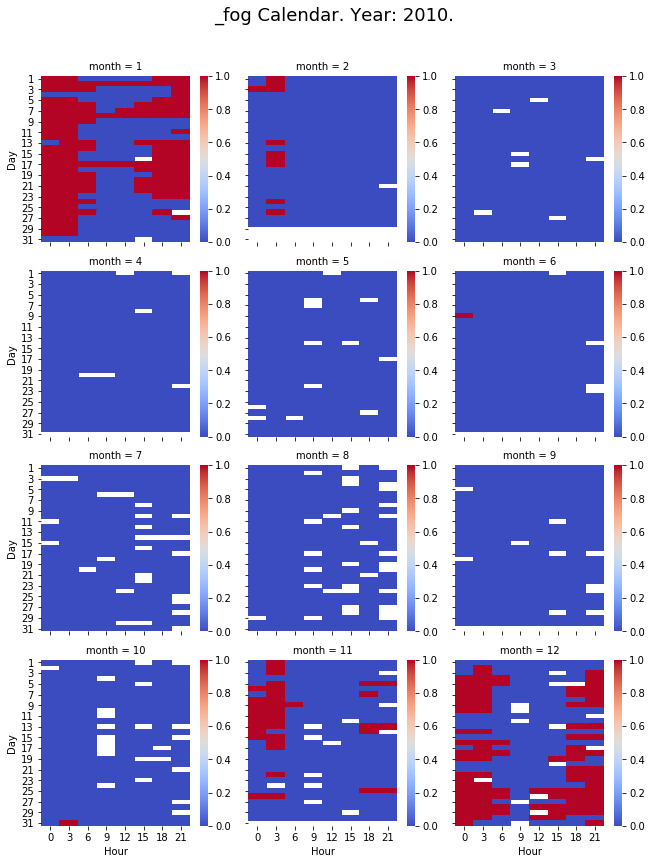

In [58]:
weather_calendar(2010,'_fog')